# Business Analytics - Case Study Retail Store
### Name: Nikhil Raj

### Roll No: CB.SC.I5DAS20023

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
custm = pd.read_csv("Customer.csv")
custm.tail()

,customer_Id,DOB,Gender,city_code
5642,274474,19-12-92,M,2.0
5643,267666,24-12-92,M,6.0
5644,270476,25-12-92,F,3.0
5645,269626,27-12-92,F,5.0
5646,274308,29-12-92,F,5.0


In [19]:
pro_hier = pd.read_csv("prod_cat_info.csv")
pro_hier.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [20]:
trans = pd.read_csv("Transactions.csv")
trans.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop


Q1) Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [21]:
test = trans.merge(pro_hier, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'], how ='left')
test

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children


The dataframe transaction is now left joined with product hierarchy using 'left' function. the 'customer_final' dataFrame combines customer details, transaction information, and product details, providing a comprehensive dataset that can be analyzed for various insights, such as customer purchasing behavior, popular products, and transaction patterns.

In [22]:
test.rename(columns={'cust_id':'customer_Id'}, inplace=True)

In [23]:
customer_final = test.merge(custm, on='customer_Id', how='left')
customer_final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-9-81,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-5-73,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-7-92,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,8-6-81,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-7-92,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-2-72,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-4-84,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-6-76,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-5-70,M,2.0


Now we merge customer data with data we merged earlier to make a final dataframe.

Q2) Prepare a summary report for the merged data set.


-> a. Get the column names and their corresponding data types

In [24]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   customer_Id        23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  prod_cat           23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  prod_subcat        23053 non-null  object 
 13  DOB                23053 non-null  object 
 14  Gender             23044 non-null  object 
 15  city_code          23045 non-null  float64
dtypes: float64(3), int64(7

These are the column names and their data types.
'cust_id' and 'prod_sub_cat_code' are integers.
'city_code', 'transaction_id', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', and 'total_amt' are floats.
'DOB', 'Gender', 'tran_date', 'Store_type', 'prod_cat', and 'prod_subcat' are strings.

-> b. Top/Bottom 10 observations

In [25]:
customer_final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-9-81,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-5-73,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-7-92,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,8-6-81,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-7-92,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,9-10-82,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,29-5-81,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,21-4-71,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,4-11-71,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,27-11-79,F,3.0


In [26]:
customer_final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,10-8-76,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,12-10-91,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,17-1-80,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,28-6-75,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,18-4-74,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-2-72,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-4-84,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-6-76,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-5-70,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,15-1-82,M,1.0


We use head() function for showing first 10 rows and tail() for displaying bottom 10 rows of a dataframe.

-> c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [27]:
customer_final.describe()

,transaction_id,customer_Id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000,10.000000


describe() function will give us the five number summary for continuous variables. 

It helps in 
- Minimum, Q1 (25th percentile), median (50th percentile), Q3 (75th percentile), and maximum values can be seen.
- Can be used for understanding the central tendency and spread of the continuous variables, detecting outliers, and understand the data distribution.

-> d. Frequency tables for all the categorical variables

In [28]:
categorical_columns = customer_final.columns.difference(customer_final.describe().columns)

In [29]:
freq_table = pd.DataFrame()
for col in categorical_columns:
    df = pd.DataFrame(customer_final.loc[:,str(col)].value_counts().reset_index())
    print(df)

           DOB  count
0     27-12-88     32
1      17-9-82     32
2      25-2-74     27
3      20-3-72     25
4     18-11-91     24
...        ...    ...
3982   29-1-76      1
3983    1-5-80      1
3984   23-6-88      1
3985   25-6-85      1
3986   10-6-72      1

[3987 rows x 2 columns]
  Gender  count
0      M  11811
1      F  11233
       Store_type  count
0          e-Shop   9311
1             MBR   4661
2  Flagship store   4577
3        TeleShop   4504
           prod_cat  count
0             Books   6069
1       Electronics   4898
2  Home and kitchen   4129
3          Footwear   2999
4          Clothing   2960
5              Bags   1998
            prod_subcat  count
0                 Women   3048
1                  Mens   2912
2                  Kids   1997
3                 Tools   1062
4               Fiction   1043
5               Kitchen   1037
6              Children   1035
7               Mobiles   1031
8                Comics   1031
9                  Bath   1023
10      

We use value_counts() to count the occurences of each category in a categorical variable.

3) Generate histograms for all continuous variables and frequency bars for categorical variables.

In [30]:
cont = customer_final.loc[:, (customer_final.dtypes=='int64') | (customer_final.dtypes=='float64')]
cont.columns

Index(['transaction_id', 'customer_Id', 'prod_subcat_code', 'prod_cat_code',
       'Qty', 'Rate', 'Tax', 'total_amt', 'prod_sub_cat_code', 'city_code'],
      dtype='object')

<Axes: >

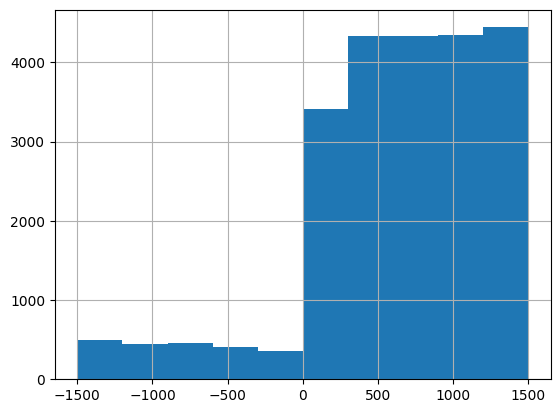

In [31]:
cont.Rate.hist()

<Axes: >

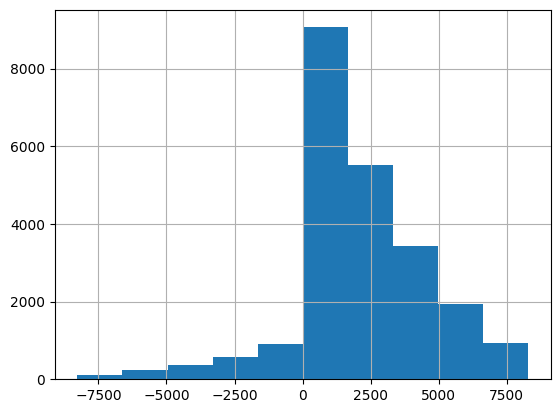

In [32]:
cont.total_amt.hist()

<Axes: >

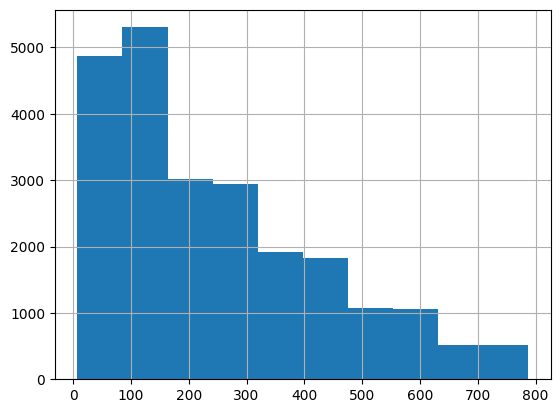

In [33]:
cont.Tax.hist()

<Axes: >

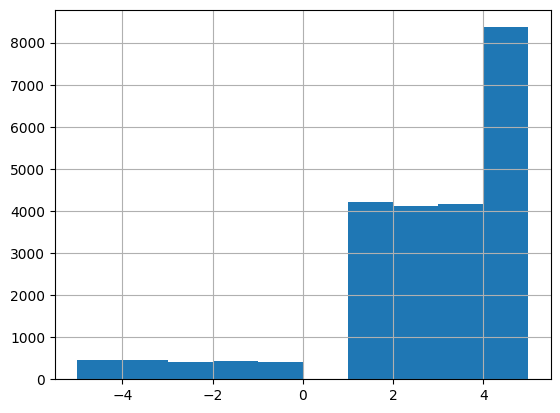

In [34]:
cont.Qty.hist()

<Axes: >

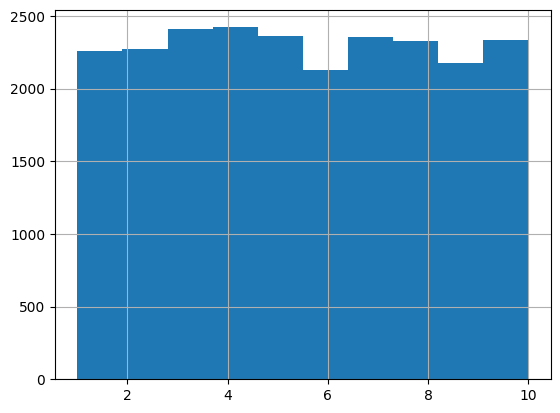

In [35]:
cont.city_code.hist()

In [36]:
cat = customer_final.loc[:, (customer_final.dtypes=='object')]
cat.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

<Axes: xlabel='Store_type'>

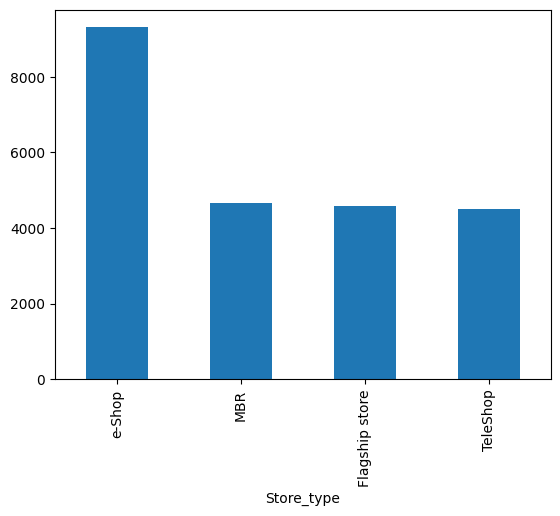

In [37]:
cat.Store_type.value_counts().plot.bar()

e-Shop is the most popular type of store among the customers.

<Axes: xlabel='Gender'>

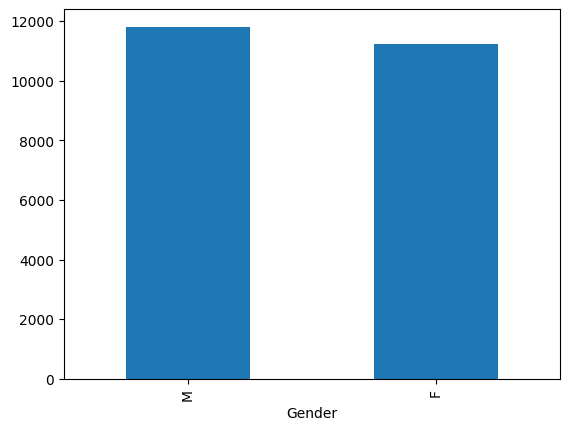

In [38]:
cat.Gender.value_counts().plot.bar()

Male and Female are kind of equally purchasing but we have to conclude that Male has more purchases than women.

<Axes: xlabel='prod_cat'>

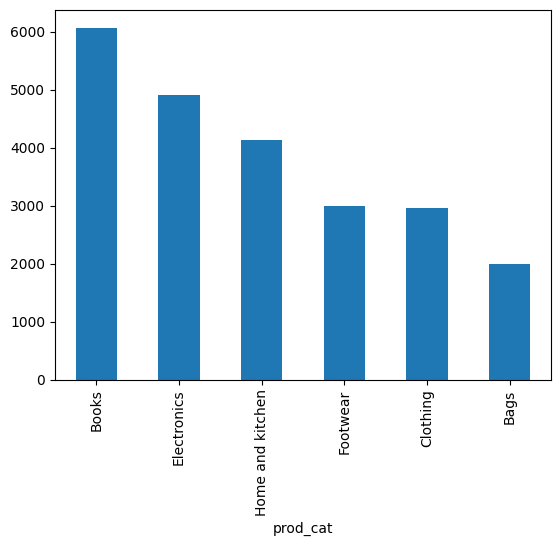

In [39]:
cat.prod_cat.value_counts().plot.bar()

Books is the most sold category in this dataset.

<Axes: xlabel='prod_subcat'>

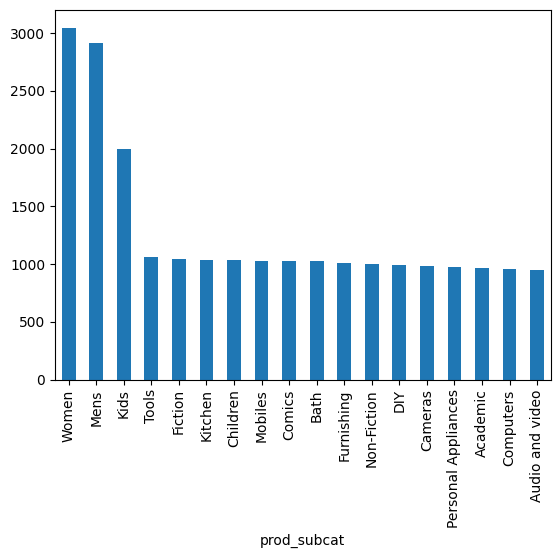

In [40]:
cat.prod_subcat.value_counts().plot.bar()

In subcategory wise, womens products are sold more than any other sub product categories.

Frequency bars for categorical variables display how often different categories appear in the data, making it easy to spot which categories are common and which ones are rare.

Histograms for continuous variables show how the data is spread out, helping us see common values, where the data tends to cluster, and if there are any unusual or extreme values.

4) Calculate the following information using the merged dataset

-> a) Time period of the available transaction data

In [41]:
trans = pd.Series(customer_final.tran_date.apply(lambda x: x.replace("/", "-")))
trans = pd.to_datetime(trans, format="%d-%m-%Y")
trans.sort_values(inplace = True)

In [42]:
first = trans[trans.size-1]
last = trans[0]
last-first

Timedelta('1130 days 00:00:00')

In [44]:
# Find the minimum and maximum dates
min_date = customer_final['tran_date'].min()
max_date = customer_final['tran_date'].max()

# Display the calculated time period
print(f"Time Period of Available Transaction Data:")
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Time Period of Available Transaction Data:
Minimum Date: 1/1/2012
Maximum Date: 9/9/2013


This calculates the minimum and maximum dates in the 'tran_date' column, providing the time period of the available transaction data.

-> b. Count of transactions where the total amount of transaction was negative

In [69]:
negative_trans = len(customer_final[customer_final.total_amt<0].total_amt)
negative_trans

2177

This method shows how many negative transactions there are in the dataset.

5) Analyze which product categories are more popular among females vs male customers.

In [46]:
count_cat = customer_final.groupby(['prod_cat', 'Gender'])['transaction_id'].count().reset_index()
count_cat.rename(columns = {'transaction_id':'count'}, inplace = True)
count_cat

,prod_cat,Gender,count
0,Bags,F,994
1,Bags,M,1004
2,Books,F,2949
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2570
8,Footwear,F,1529
9,Footwear,M,1469


In [47]:
max_tran = count_cat.groupby('prod_cat')['count'].max()
max_gender = count_cat.merge(max_tran, on='count', how='right')
max_gender

,prod_cat,Gender,count
0,Bags,M,1004
1,Books,M,3116
2,Clothing,M,1518
3,Electronics,M,2570
4,Footwear,F,1529
5,Home and kitchen,M,2134


This information is valuable for identifying trends and preferences among male and female customers. By understanding how they behave differently in terms of their purchases, businesses can tailor their marketing strategies and inventory management to better meet the specific interests and needs of each gender. This targeted approach can lead to more effective marketing campaigns and improved customer satisfaction.

6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [48]:
city_count = customer_final.groupby('city_code')['transaction_id'].count().reset_index()
city_count

,city_code,transaction_id
0,1.0,2258
1,2.0,2270
2,3.0,2411
3,4.0,2422
4,5.0,2360
5,6.0,2127
6,7.0,2356
7,8.0,2330
8,9.0,2178
9,10.0,2333


In [49]:
city_count[city_count.transaction_id == city_count.transaction_id.max()]

,city_code,transaction_id
3,4.0,2422


In [73]:
city_customer_counts = customer_final['city_code'].value_counts()

# Find the city code with the maximum customers
max_customers_city_code = city_customer_counts.idxmax()
max_customers_count = city_customer_counts.max()

# Calculate the percentage of customers from the city with the maximum customers
percentage_max_customers = (max_customers_count / len(customer_final)) * 100

# Display the results
print(f"City Code with Maximum Customers: {max_customers_city_code}")
print(f"Percentage of Customers from City {max_customers_city_code}: {percentage_max_customers:.2f}%")

City Code with Maximum Customers: 4.0
Percentage of Customers from City 4.0: 10.51%


By targeting specific cities or regions, businesses can allocate resources more efficiently and effectively reach their target audience, ultimately leading to improved business performance.

7. Which store type sells the maximum products by value and by quantity?


In [50]:
quantity = customer_final.groupby('Store_type')['Qty'].sum().reset_index()
quantity

,Store_type,Qty
0,Flagship store,11133
1,MBR,11194
2,TeleShop,10984
3,e-Shop,22763


In [51]:
quantity[quantity.Qty == quantity.Qty .max()]

,Store_type,Qty
3,e-Shop,22763


In [52]:
value = customer_final.groupby('Store_type')['total_amt'].sum().reset_index()
value

,Store_type,total_amt
0,Flagship store,9.715688e+06
1,MBR,9.674486e+06
2,TeleShop,9.364781e+06
3,e-Shop,1.982482e+07


In [53]:
value[value.total_amt == value.total_amt.max()]

,Store_type,total_amt
3,e-Shop,19824816.05


The e-Shop store type outperforms other store types in terms of both the quantity and value of products sold. It holds the top position for selling the highest quantity as well as achieving the highest total value of products sold among all store types. This indicates that the e-Shop store type is particularly successful and may be a key driver of revenue for the business.

8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [54]:
cat_val = customer_final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().reset_index()
flagship = cat_val[cat_val.Store_type == 'Flagship store']    
EandC = flagship[(flagship.prod_cat == 'Electronics') | (flagship.prod_cat == 'Clothing')]

In [55]:
EandC

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


In [75]:
total_amount_earned = EandC['total_amt'].sum()
print("Total amount earned from 'Electronics' and 'Clothing' categories from Flagship Stores:", total_amount_earned)

Total amount earned from 'Electronics' and 'Clothing' categories from Flagship Stores: 3409559.27


The total amount earned from the "Electronics" and "Clothing" categories in Flagship Stores is $3,409,559.27 in the `Customer_Final` DataFrame.

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [56]:
sale_gender = customer_final.groupby(['prod_cat', 'Gender'])['total_amt'].sum().reset_index()
sale_gender

,prod_cat,Gender,total_amt
0,Bags,F,2077985.650
1,Bags,M,2046722.990
2,Books,F,6164692.235
3,Books,M,6645972.775
4,Clothing,F,3026750.805
5,Clothing,M,3224079.495
6,Electronics,F,5019354.210
7,Electronics,M,5703109.425
8,Footwear,F,3202552.990
9,Footwear,M,3014672.050


In [57]:
sale_gender[(sale_gender.prod_cat=="Electronics") & (sale_gender.Gender=="M")]

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425



The total revenue earned from male customers purchasing products in the "Electronics" category within the Customer_Final DataFrame amounts to $5,703,109.425. This insight underscores the significant contribution of male customers to the revenue generated from electronic products. It provides valuable information for devising targeted marketing campaigns and optimizing inventory management strategies within this category.

10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [58]:
postive_trans = customer_final[customer_final.total_amt>0].reset_index(drop=True)
postive_trans

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,5,Computers,11-5-73,F,8.0
1,25455265351,267750,20-02-2014,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,13-10-86,M,1.0
2,1571002198,275023,20-02-2014,6,5,4,587,246.540,2594.540,e-Shop,Books,6,DIY,9-3-71,M,6.0
3,36554696014,269345,20-02-2014,3,5,3,1253,394.695,4153.695,e-Shop,Books,3,Comics,26-6-70,F,10.0
4,56814940239,268799,20-02-2014,7,5,5,368,193.200,2033.200,e-Shop,Books,7,Fiction,27-6-79,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20871,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-2-72,M,7.0
20872,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-4-84,M,9.0
20873,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-6-76,M,8.0
20874,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-5-70,M,2.0


In [59]:
transaction_count = postive_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [60]:
transaction_count[transaction_count.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11



The analysis reveals that there are 6 customers who have conducted more than 10 unique transactions after excluding transactions with negative amounts. This finding highlights a subset of customers who have been highly active in making purchases. Understanding this subset is crucial for developing effective customer retention and engagement strategies. 

11. For all customers aged between 25 - 35, find out:

In [61]:
customer_final.DOB = pd.to_datetime(customer_final.DOB, format="%d-%m-%y", dayfirst=True)
DOB = customer_final.DOB

In [62]:
customer_final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

In [63]:
age_barred = customer_final[(customer_final.age>=25) & (customer_final.age<=35)].reset_index(drop=True)
age_barred.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,32
1,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,32
2,91116291703,268509,20-02-2014,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,1989-08-17,M,10.0,35
3,88853694830,268444,20-02-2014,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,1992-01-02,F,6.0,32
4,31384765864,267058,19-02-2014,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,1992-02-06,F,10.0,32


-> a. What was the total amount spent for “Electronics” and “Books” product categories?

In [64]:
age_catg = age_barred.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg

,prod_cat,total_amt
0,Bags,696442.825
1,Books,2109168.750
2,Clothing,1179706.840
3,Electronics,1819301.835
4,Footwear,1100413.145
5,Home and kitchen,1493283.740


In [77]:
agetc = age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]
agetc

,prod_cat,total_amt
1,Books,2109168.750
3,Electronics,1819301.835


In [78]:
total_amount_earned = agetc['total_amt'].sum()
print("Total amount earned from 'Electronics' and 'Books' categories from customers aged between 25 and 35:", total_amount_earned)


Total amount earned from 'Electronics' and 'Books' categories from customers aged between 25 and 35: 3928470.585



The total revenue earned from the 'Electronics' and 'Books' categories by customers aged between 25 and 35 amounts to $3,928,470.585. This insight underscores the significant contribution of customers in this age group to the revenue generated from these product categories.

-> b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [66]:
age_barred.tran_date = age_barred.tran_date.apply(lambda x: x.replace('/', '-'))
age_barred.tran_date = pd.to_datetime(age_barred.tran_date, format='%d-%m-%Y')

In [67]:
date_barred = age_barred[(age_barred.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age_barred.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_barred

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,32
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,32
2,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,1989-08-17,M,10.0,35
3,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,1992-01-02,F,6.0,32
4,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,1992-02-06,F,10.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,77232232822,273564,2014-01-03,3,5,3,436,137.340,1445.340,e-Shop,Books,3,Comics,1992-03-11,F,3.0,32
174,32899104170,270064,2014-01-02,2,6,3,802,252.630,2658.630,TeleShop,Home and kitchen,2,Furnishing,1990-02-22,F,3.0,34
175,14302941720,273058,2014-01-02,1,2,1,674,70.770,744.770,e-Shop,Footwear,1,Mens,1989-08-11,F,10.0,35
176,32125935023,272067,2014-01-02,10,3,5,1211,635.775,6690.775,e-Shop,Electronics,10,Audio and video,1989-05-14,M,5.0,35


In [68]:
date_barred.total_amt.sum()

416304.32999999996

The total amount spent by customers aged between 25 and 35 from 1st Jan, 2014 to 1st Mar, 2014 is $416,304.33. This insight provides valuable information about the expenditure behavior of this specific age group during this time period.